# Potential treatments for squamous cell carcinoma

Pymaceuticals Inc. is a pharmaceutical company based out of San Diego. Pymaceuticals specializes in anti-cancer pharmaceuticals. In its most recent efforts, it began screening for potential treatments for squamous cell carcinoma (SCC), a
commonly occurring form of skin cancer. In their  most recent animal study, 249 mice identified with SCC tumor growth were treated through a variety of drug regimens. Over the course of 45 days, tumor development was observed and measured. The purpose 
of this study was to compare the performance of Pymaceuticals' drug of interest, Capomulin, versus the other treatment regimens. In this technical report some contrast between treatments and models of groth of tumors is presented.

# Highlights about the research

* The best treatment seems to be Capomulin, since tumor volume tends to reduce in time.

* There is a positive correlatioin between the mice weight and the average tumor volume in teh case of Capomuline

* Also, capomuline tends to act almost the same for male and female mice. 

In [1]:
#Lets import the modules
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

#Lets know the df
print(mouse_metadata.shape)
print(mouse_metadata.head())
print(study_results.shape)
print(study_results.head())

(249, 5)
  Mouse ID Drug Regimen     Sex  Age_months  Weight (g)
0     k403     Ramicane    Male          21          16
1     s185    Capomulin  Female           3          17
2     x401    Capomulin  Female          16          15
3     m601    Capomulin    Male          22          17
4     g791     Ramicane    Male          11          16
(1893, 4)
  Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites
0     b128          0                45.0                 0
1     f932          0                45.0                 0
2     g107          0                45.0                 0
3     a457          0                45.0                 0
4     c819          0                45.0                 0


In order to know the impact of different pharmaceuticals in the development of certain carcinoma cells, it is important to compare different drug regimens under which different mice of various ages and sex react to them by registering the day of treatment , the tumor volume (in $mm^{3}$) and the metastics sites. It is important to investigate if the mice sample is equally distributed among male and female mice and metween drug regimen.

In [2]:
#lets investigate deeper the df's
A = len(mouse_metadata["Mouse ID"].value_counts())
B= len(study_results["Mouse ID"].value_counts())

print(f"There are {A} unique mice in this research")

There are 249 unique mice in this research


In [3]:
# Combine the data into a single dataset
mice_df = pd.merge(mouse_metadata, study_results, how='outer', on = 'Mouse ID')

# Display the data table for preview
print(mice_df.shape)
mice_df.head()


(1893, 8)


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [4]:
#Lets investigate if there are repeated mice.
#Lets group by Mouse ID and time point and count the frequency by both variables
aux = mice_df.groupby(["Mouse ID", "Timepoint"]).size().reset_index(name="Frequency")
#Now the aux df is ordered by descending Frequency
aux.sort_values("Frequency", ascending = False, inplace = True)
aux

,Mouse ID,Timepoint,Frequency
590,g989,20,2
589,g989,15,2
588,g989,10,2
587,g989,5,2
586,g989,0,2
...,...,...,...
628,i334,20,1
627,i334,15,1
626,i334,10,1
625,i334,5,1


As we can se there are some mice with duplicated data by Timepoint, lets remove them.

In [5]:
#Lets filter aux by those id that has a frequency greater than two
aux = aux[(aux['Frequency'] > 1)]
#Lets extract a list of unique values
rep_mice = aux['Mouse ID'].unique()
print(rep_mice)
rep_mice[0]

['g989']


'g989'

Therefore, there is one mouse with duplicated data by id and time point. The mouse is identified as g989. That specific mouse must be removed from data (the duplicated values) in order to have a reliable analysis.

In [6]:
#Lets remove the mouse g989

#Get indexes where name column has value rep_mice
indexNames = mice_df[mice_df['Mouse ID'] == rep_mice[0]].index
 
# Delete these row indexes from dataFrame
mice_df.drop(indexNames , inplace=True)

print(f"{len(indexNames)} were removed from original data")
print(f"New Data shape is {mice_df.shape}")

13 were removed from original data
New Data shape is (1880, 8)


# Drug regimen statistics

In the next section the descriptive statistics of the tumor volume per drug regimen is presented. The idea is to get an idea of how does each treatment affect the volume of the tumor in mices.

In [7]:
#Lets group the mice_df by drug regimen
drug_gp = mice_df.groupby(['Drug Regimen'])
drug_gp

In [8]:
#Lets get the mean
mean_tv = drug_gp['Tumor Volume (mm3)'].mean()
#Lets get the median
median_tv = drug_gp['Tumor Volume (mm3)'].median()
#Lets get the variance
variance_tv = drug_gp['Tumor Volume (mm3)'].var()
#Lets get the standard deviation
stdv_tv = drug_gp['Tumor Volume (mm3)'].std()
stdv_tv
#Lets get the unbiased standard error of the mean
sem_tv = drug_gp['Tumor Volume (mm3)'].sem()
#Lets create a df with such an info
statistics_drug_tv = pd.DataFrame({'Mean Tumor Volume (mm3)' : mean_tv,
                                  'Median Tumor Volume (mm3)': median_tv,
                                  'Variance of Tumor Volume (mm3)': variance_tv,
                                  'Standard deviation of Tumor Volume (mm3)': stdv_tv,
                                  'SEM of Tumor Volume (mm3)': sem_tv})
statistics_drug_tv


,Mean Tumor Volume (mm3),Median Tumor Volume (mm3),Variance of Tumor Volume (mm3),Standard deviation of Tumor Volume (mm3),SEM of Tumor Volume (mm3)
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


From the last tabe it seems that there are two drugs that tends to have smaller tumor volumes. The best one might be Ramicane and the second best one might be Capomulin. On the other hand, the worst drug regimen might be Ketapril and  Naftisol with greater mean tumor volume.  Another advantage is that both Ramicane and Capomulin tend to have less variance and standard deviation, which migth implie that there are no over grown tumors or very small ones. 

# Distribution of mice

Another characteristic of the data frame that is important to know is how does mice are distributed by categorical data. In particular if we have he same amount of mice by drug treatment, in rder to validate the last observations about the tummor volume, and also to know if we have a symmetric  distribution between male and female mice. 

First, we are gooing to nvestigate of mice is equally distributed among treatmets. This is achieved through th next bar graph.

In [9]:
#Since there are many observations of the same mouse we are going to drop duplicated and left one observation per MOUSE ID
#tHE DATAFRME MUST BE OF LENGTH 249 0R 248 WITHOUT HTE REPEATED MOUSE

#We are going to use mouse_metadata
#We take out the observation of the repeated mouse
ids = rep_mice[0]
mouse_metadata2 = mouse_metadata[mouse_metadata['Mouse ID'] != ids]
print(mouse_metadata2.shape)
print(mouse_metadata.shape)

#Group by treatment, count how many Mouse_ID are in each treatment, reset the index ans rename as Frequency
drug_count_1 = mouse_metadata.groupby(['Drug Regimen']).size().reset_index(name="Frequency")
drug_count_2 = mouse_metadata2.groupby(['Drug Regimen']).size().reset_index(name="Frequency")
drug_count_1
#drug_count_2


(248, 5)
(249, 5)


,Drug Regimen,Frequency
0,Capomulin,25
1,Ceftamin,25
2,Infubinol,25
3,Ketapril,25
4,Naftisol,25
5,Placebo,25
6,Propriva,25
7,Ramicane,25
8,Stelasyn,24
9,Zoniferol,25


[Text(0, 0.5, 'Number of Mice')]

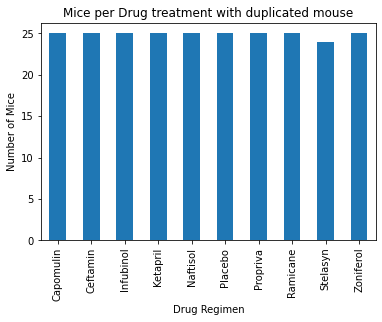

In [10]:
graph_1 = drug_count_1.plot(kind='bar', x='Drug Regimen', title='Mice per Drug treatment with duplicated mouse', legend=False)
graph_1.set(ylabel='Number of Mice')

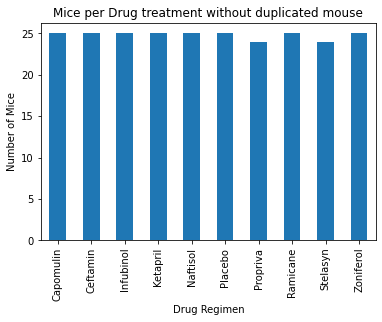

In [11]:
#Incomplete observation graph
graph_2=drug_count_2.plot(kind='bar', x='Drug Regimen', title='Mice per Drug treatment without duplicated mouse', legend=False)
graph_2.set(ylabel='Number of Mice')

#Show graph
plt.show()


From both graphs it is observed that the treatment Stelasyn is missing a mouse. Also, when repeated observations are removed tehn the Propriva group is missing also a mous. It is possible that the duplicated mouse was classified wrong.

On the other hand, in the next pie chart it is observed hw does mice are distributed around sex variable. We use only the complete set of observations (i.e. we dont drop the duplicated mouse)

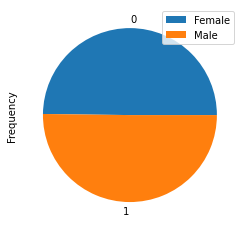

In [12]:
#Lets group by mouse's sex
sex_gp = mouse_metadata. groupby('Sex').size().reset_index(name="Frequency")

piec = sex_gp.plot(kind="pie", y='Frequency')
piec.legend(labels=['Female', 'Male'],loc="best")

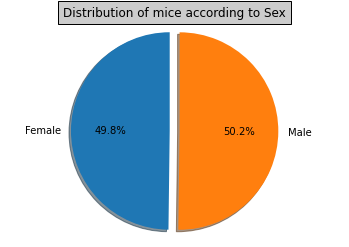

In [13]:
labels =sex_gp['Sex'].tolist()
sizes = sex_gp['Frequency'].tolist()
explode = (0, 0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')

plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.title("Distribution of mice according to Sex", bbox={'facecolor':'0.8', 'pad':5})

plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

From the pie chart it is noticiable that the distribution of mice among sex is almost identical. There is only one extra male mouse.

Therefore, it is possible to trust in the statistical summary obtained above. And we can select the four most promisory treatments which are the ones with smallest tumor volume, in average. Such treatmentes are Ramicane, Capomulin, Infubinol, and Ceftamin. In the next section the effects of these drugs are analyzed.

# The most promising treatments

In order to evaluate the most promising treatment it is necessary to investigate the efect of each drug over the final tumor volume of each mouse.  To do so, the quantiles, the IQR, and the values to detect outliers are calculated.

In [14]:
#Lets filter by drug treatment the original df by using or
final_drug_df = mice_df.loc[(mice_df['Drug Regimen'] == 'Capomulin') | (mice_df['Drug Regimen'] == 'Ramicane') |(mice_df['Drug Regimen'] == 'Infubinol') | (mice_df['Drug Regimen'] == 'Ceftamin') ]
print(final_drug_df.shape)
final_drug_df

(814, 8)


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1868,z581,Infubinol,Female,24,25,25,54.316407,2
1869,z581,Infubinol,Female,24,25,30,56.286750,2
1870,z581,Infubinol,Female,24,25,35,58.628399,3
1871,z581,Infubinol,Female,24,25,40,60.053740,3


In [15]:
#It is important to note that not all the mice survive until the 45 max timepoint. Therefore, to obtain the last tumor
#volume measure it is necessary to extract the last time point.

#Group by mouse 
gpo_pba = final_drug_df.groupby("Mouse ID")
#Get the max time point
max_time = gpo_pba['Timepoint'].max()

#Create a df resenting the index
last_measure_df = max_time.reset_index()

#Merge with final_drug_df
last_measure_df = pd.merge(last_measure_df, final_drug_df, how ='inner', on = ['Mouse ID', 'Timepoint'])
last_measure_df

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a275,45,Ceftamin,Female,20,28,62.999356,3
3,a411,45,Ramicane,Male,3,22,38.407618,1
4,a444,45,Ramicane,Female,10,25,43.047543,0
...,...,...,...,...,...,...,...,...
95,y769,45,Ceftamin,Female,6,27,68.594745,4
96,y793,45,Capomulin,Male,17,17,31.896238,2
97,y865,45,Ceftamin,Male,23,26,64.729837,3
98,z578,45,Ramicane,Male,11,16,30.638696,0


In [16]:
#Lets get the quantile for each treatment

#Tuppleof  drug type
drug_type = ['Infubinol', 'Ceftamin', 'Ramicane', 'Capomulin']

#Empety list to store the quantiles, IQR, lower bound, and upper bound
drug_quan_25 = []
drug_quan_50 = []
drug_quan_75 = []
drug_iqr = []
drug_lb = []
drug_ub = []

#Loop to get the quantiles, etc.
for drug in drug_type :
    #Filter by drug treatment
    aux = last_measure_df.loc[last_measure_df['Drug Regimen'] == drug]
    #Get the quantiles
    quantile_temp = aux['Tumor Volume (mm3)'].quantile([.25,.5,.75])
    drug_quan_25.append(quantile_temp[0.25])
    drug_quan_50.append(quantile_temp[0.5])
    drug_quan_75.append(quantile_temp[0.75])
    drug_iqr.append(quantile_temp[0.75]-quantile_temp[0.25])
    drug_lb.append(quantile_temp[0.25]-(1.5*(quantile_temp[0.75]-quantile_temp[0.25])))
    drug_ub.append(quantile_temp[0.75]+(1.5*(quantile_temp[0.75]-quantile_temp[0.25])))

#Lets make a df
drug_info = pd.DataFrame({'Drug Regimen' : drug_type,
                         'Lower quartile': drug_quan_25,
                         'Median': drug_quan_50,
                         'Upper quartile' : drug_quan_75,
                         'IQR': drug_iqr,
                         'lower bound': drug_lb,
                         'upper bound': drug_ub})

drug_info.sort_values('Median', inplace = True)
drug_info

,Drug Regimen,Lower quartile,Median,Upper quartile,IQR,lower bound,upper bound
2,Ramicane,31.560470,36.561652,40.659006,9.098537,17.912664,54.306811
3,Capomulin,32.377357,38.125164,40.159220,7.781863,20.704562,51.832015
1,Ceftamin,48.722078,59.851956,64.299830,15.577752,25.355450,87.666458
0,Infubinol,54.048608,60.165180,65.525743,11.477135,36.832905,82.741446


In the last table it can be observed that both Ramicane and Capomulin are the best treatment since the last measurement of the tumor volume is smaller for each quartile. However, Capomuline has a lower IQR, wich means that 75% of the measurment are very near. Also, by observing the upper bound it is noticiable that the tummors for Capomulin tends to be smaller.

The next step is to search for outliers, this could help to identify strange behaviors in measurements, which are presented in the next table.

In [17]:
# Lets merge the quartile info with the df of last measurement
aux = pd.merge(last_measure_df, drug_info, how = 'outer', on = 'Drug Regimen')
aux['low_outlier'] = aux['Tumor Volume (mm3)'] < aux ['lower bound']
aux['up_outlier'] = aux['Tumor Volume (mm3)'] > aux ['upper bound']

#Lets extract the list
aux = aux[(aux['low_outlier']== True) | (aux['up_outlier']== True)]
aux.drop(labels=["Lower quartile", "Median", "Upper quartile", "IQR", "lower bound", "upper bound"], axis=1, inplace = True)
aux

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites,low_outlier,up_outlier
5,c326,5,Infubinol,Female,18,25,36.321346,0,True,False


Another way to detect outliers is through a visual tool called box plot. In the figure below are presented four boxplots, one for each drug treatment. The heigh of the box represent the IQR and the line inside the box is the median. 

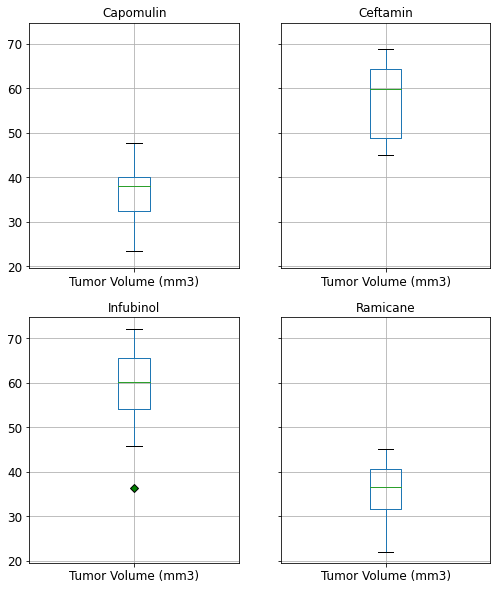

In [18]:
#Drop not necessary columns
aux = last_measure_df.drop(labels=["Mouse ID", "Timepoint", "Sex", "Age_months", "Weight (g)", "Metastatic Sites"], axis = 1)
#Group by drug
drug_gp = aux.groupby('Drug Regimen')
#Define dictionary for outliers
green_diamond = dict(markerfacecolor='g', marker='D')

#And lets draw the boxplots
drug_gp.boxplot(flierprops=green_diamond, fontsize=12, figsize=(8,10))
plt.show()

In the figure, we casn see that as suspected earlier there is an outlier for Infubinol, there is a small tumor volume for this drug. We can aslo confirm that the best drugs are Capomuline and Ramicane.  But it seems that the best one is Capomuline, sice the bos is smaller and better distributed.

# The capomuline treatment

From the observations above the best drug seems to be Capomuline. Therefore, a deeper analysis is going to be done. Particularly over one mouse that behaves mostly as the mean of the group of Capomuline trated mice.

In [19]:
#Filter by Capomuline
capomulin_df = mice_df.loc[mice_df['Drug Regimen'] == 'Capomulin']

#Lets group by  sex
capomulin_gp = capomulin_df.groupby(["Sex"])
#Lets count by sex
capomulin_gp['Sex'].count()


Sex
Female    128
Male      102
Name: Sex, dtype: int64

In [20]:
#Now lets get the average age and weight
capomulin_gp['Age_months'].mean()

Sex
Female    11.625000
Male      15.754902
Name: Age_months, dtype: float64

In [21]:
capomulin_gp["Weight (g)"].mean()

Sex
Female    20.062500
Male      19.843137
Name: Weight (g), dtype: float64

With these three summary we have to choose a female mouse that weights almot 20 g and that has between 11 and 12 months.

In [22]:
#Lets chose only female mouse
capomulin_female = capomulin_df.loc[capomulin_df["Sex"] == "Female"]

#Now we group by id
capomulin_gp = capomulin_female.groupby(["Mouse ID"])

#lETS GET THE MEAN WEIGHT
capomulin_gp["Weight (g)"].mean()


Mouse ID
b128    22
g316    22
i557    24
i738    20
j119    23
j246    21
m957    19
r554    17
s185    17
s710    23
t565    17
v923    21
x401    15
Name: Weight (g), dtype: int64

In [23]:
#Lets get the age
capomulin_gp['Age_months'].mean()

Mouse ID
b128     9
g316    22
i557     1
i738    23
j119     7
j246    21
m957     3
r554     8
s185     3
s710     1
t565    20
v923    19
x401    16
Name: Age_months, dtype: int64

In [24]:
#Count how many observations we have
capomulin_gp.count()

,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
b128,10,10,10,10,10,10,10
g316,10,10,10,10,10,10,10
i557,10,10,10,10,10,10,10
i738,10,10,10,10,10,10,10
j119,10,10,10,10,10,10,10
j246,8,8,8,8,8,8,8
m957,10,10,10,10,10,10,10
r554,10,10,10,10,10,10,10
s185,10,10,10,10,10,10,10


From the last three tables it seems that the mouse that best represents the sample is the one with the ID m957. Therefore, with this mouse the next analysis are going to be done.

[Text(0, 0.5, 'Tumor Volume (mm3)')]

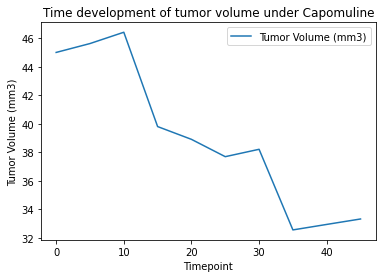

In [25]:
mouse_957 = mice_df[mice_df['Mouse ID'] == 'm957']
mp =mouse_957.plot(kind="line", x='Timepoint', y='Tumor Volume (mm3)', title= 'Time development of tumor volume under Capomuline')
mp.set(ylabel='Tumor Volume (mm3)')

From the last graph it seems that tumor volume decreases while time passes. Nonetheless, care must be taken sice there are some peaks for certain time ponts. 
Another importat thing that it is important to compare is the weight of the mouse versus the tumor volume. For this the next scatterplot might give a clue over other facts that might affect the Capomulin treatment response over tumor Volume.

In [26]:
#Lets group by time point and weight
pba = capomulin_df.groupby(['Timepoint', 'Weight (g)'])
#Lets get the average tumor volume
avg_tv = pba['Tumor Volume (mm3)'].mean()
avg_tv2 =avg_tv.reset_index(level=('Timepoint','Weight (g)'))
avg_tv2

,Timepoint,Weight (g),Tumor Volume (mm3)
0,0,15,45.000000
1,0,17,45.000000
2,0,19,45.000000
3,0,20,45.000000
4,0,21,45.000000
...,...,...,...
85,45,21,39.280453
86,45,22,39.571049
87,45,23,39.426871
88,45,24,47.685963


In [27]:
avg_tv2 = avg_tv2.loc[avg_tv2['Timepoint'] == 45]
avg_tv2

,Timepoint,Weight (g),Tumor Volume (mm3)
81,45,15,28.484033
82,45,17,30.254563
83,45,19,36.416666
84,45,20,37.311846
85,45,21,39.280453
86,45,22,39.571049
87,45,23,39.426871
88,45,24,47.685963
89,45,25,41.581521


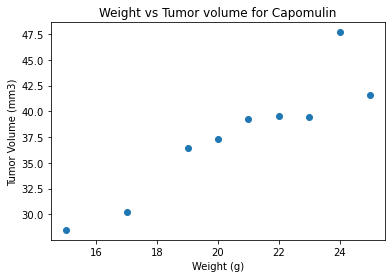

In [28]:
#Lets make an scatterplot
x_values = avg_tv2['Weight (g)']
y_values = avg_tv2['Tumor Volume (mm3)']
plt.scatter(x_values, y_values)
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Weight vs Tumor volume for Capomulin')
plt.show()

From this plot it is not so clear if there is a linear relation. Therefore, the correlation coefficient is going to be estimated.

In [29]:
corr, p_val = st.pearsonr(x_values, y_values)
print(f"The Pearsons correlation is {round(corr, 2)} with a p value {round(p_val,4)}")

The Pearsons correlation is 0.92 with a p value 0.0004


Since the correlation coeficient is almost one, and the p value is less than 0.05 then it is possible to make a linear regression. 

In [30]:
#Lets define a tupple to save the results of the regression
slope, intercept, r_value, p_value, std_err = st.linregress(x_values,y_values)
reg_eq = f"y = {round(slope, 4)}*x + {round(intercept, 4)}"
y_est = round(slope*x_values + intercept, 2)

print(f"The regression line is given by {reg_eq}")

The regression line is given by y = 1.6172*x + 4.3572


The r-squared is: 0.8459487317666621


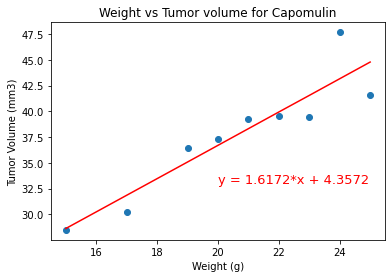

In [31]:
#Lets graph the regression result
plt.scatter(x_values, y_values)
plt.plot(x_values, y_est, 'r-')
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Weight vs Tumor volume for Capomulin')
plt.annotate(reg_eq, (20,33), fontsize=13, color='red')
print(f"The r-squared is: {r_value**2}")
plt.show()


It is important to notice that the bigger the weight the bigger the average tumor volume. Also, the correlation is very strong and statistically significant. It seems that the best treatment is Capomulin.